# FunctionTrace Profiler

A graphical Python profiler that provides a clear view of your application's execution while being both low-overhead and easy to use.
To know more about FunctionTrace visit the **[home page](https://functiontrace.com/)**

FunctionTrace can be called on existing Python applications with absolutely **no modifications**, and provides a complete and precise view of your application's entire execution. You'll see what functions your various Python processes and threads executed over time, when and what information was logged, where allocations occurred, and more. FunctionTrace does not profile GPU workloads. It can profile individual threads. It does not provide memory consumption information.

FunctionTrace supports all of the useful profiling views you're familiar with, including **Stack Charts**, **Flame Graphs**, and **Call Trees**, thanks to its integration with the **[Firefox Profiler](https://profiler.firefox.com/)**

### To Install FunctionTrace

FunctionTrace comes in two necessary pieces: a server, and a language-specific client.

**Using pip**

Note: It's currently necessary to have cargo installed in order to install FunctionTrace, as functiontrace-server is not packaged for all supported operating systems. You can install **cargo via rustup.** to know more about installing cargo visit the **[installation link.](http://web.mit.edu/rust-lang_v1.25/arch/amd64_ubuntu1404/share/doc/rust/html/cargo/getting-started/installation.html)**

**Install the server** <br>
`cargo install functiontrace-server`

**Install the Python client** <br>
`pip install functiontrace`


### Ways to Profile Python Code using FunctionTrace

- **1. Profile python script using FunctionTrace:** We can use FunctionTrace to profile any python script with no modification in code.

### 1. Profile python script using FunctionTrace:

Create a python file **example.py**  and **uncomment** the code. We have already created one for your reference, so you are free to skip this step.

In [1]:
# import random

# def random_number_generator():           ## This function return a random number
#     arr1 = [random.randint(1,10) for i in range(100000)]   
#     arr2 = [random.randint(1,10) for i in range(100000)]
#     arr3 = [arr1[i]+arr2[i] for i in range(100000)]
#     del arr1
#     del arr2
#     tot = sum(arr3)
#     del arr3
#     print(tot)

# if __name__ == "__main__":
#     random_number_generator()

To know how to use **FunctionTrace** use the help function

In [2]:
!python -m functiontrace --help

usage: functiontrace.py [-h] [--trace-memory] [--output-dir OUTPUT_DIR] [-v]
                        ...

Trace a script's execution.

positional arguments:
  script

optional arguments:
  -h, --help            show this help message and exit
  --trace-memory, --trace_memory
                        Trace memory allocations/frees when enabled. This may
                        add tracing overhead, so is disabled by default.
  --output-dir OUTPUT_DIR, --output_dir OUTPUT_DIR
                        The directory to output trace files to
  -v, --version         show program's version number and exit


To profile the **example.py** file using **FunctionTrace** execute the below line

In [3]:
!functiontrace --output-dir 'example_results/' example.py 

1102329


### Example to use **FunctionTrace** for **intelligent_indexing** ref kit 

The **[Intelligent Indexing](https://github.com/oneapi-src/intelligent-indexing)** ref kit demonstrates one way of building an NLP pipeline for classifying documents to their respective topics and describe how we can leverage the **Intel® AI Analytics Toolkit (AI Kit)** to accelerate the pipeline.

**Intel® AI Analytics Toolkit (AI Kit)** is used to achieve quick results even when the data for a model are huge. It provides the capability to reuse the code present in different languages so that the hardware utilization is optimized to provide these results.

The **Intelligent Indexing** ref kit has different Intel® oneAPI optimizations enabled like:
- **[Intel® Distribution of Modin*](https://www.intel.com/content/www/us/en/developer/tools/oneapi/distribution-of-modin.html#gs.v03x2l)**
The Intel® Distribution of Modin* is a performant, parallel, and distributed dataframe system that is designed around enabling data scientists to be more productive. It provides drop-in acceleration to your existing **pandas** workflows. No upfront cost to learning a new API. Integrates with the Python* ecosystem. Seamlessly scales across multicores with Ray* and Dask* clusters (run on and with what you have)
- **[Intel® Extension for Scikit-learn*](https://www.intel.com/content/www/us/en/developer/tools/oneapi/scikit-learn.html)**
Designed for data scientists, Intel® Extension for Scikit-Learn* is a seamless way to speed up your Scikit-learn applications for machine learning to solve real-world problems. This extension package dynamically patches scikit-learn estimators to use Intel® oneAPI Data Analytics Library (oneDAL) as the underlying solver, while achieving the speed up for your machine learning algorithms out-of-box.

**NOTE** Please visit the **[Intelligent Indexing](https://github.com/oneapi-src/intelligent-indexing)** Ref kit page to know more about the kit.
- Please follow the steps in github repo to clone and create the environment.
- After creating environment install **FunctionTrace** in both the environments **doc_class_stock** and **doc_class_intel** using `pip install functiontrace`

**We will be using FunctionTrace to profile this workload below.**

#### Profile the Intelligent Indexing Ref Kit with Stock Packages

To run the profiler on the intelligent indexing ref kit <br>
- Navigate to directory **intelligent-indexing/src/** in terminal
- ```conda activate doc_class_stock```

Execute the below command in Terminal:

`functiontrace --output-dir '../../Profiling_Guide/FunctionTrace_Profiler/FunctionTrace_Results/stock_results' run_benchmarks.py -l "../logs/stock_stock.log"`

The above command will generate a **json** file containing the **profiling results** in the **--output-dir** mentioned above.

To view **FunctionTrace results** download the json file for respective results and visit the **[firefox profiler](https://profiler.firefox.com/)** and upload the json file there to view results

Sample result has **Call Tree**, **Flame Graph**, **Stack Chart**, **Marker Chart**
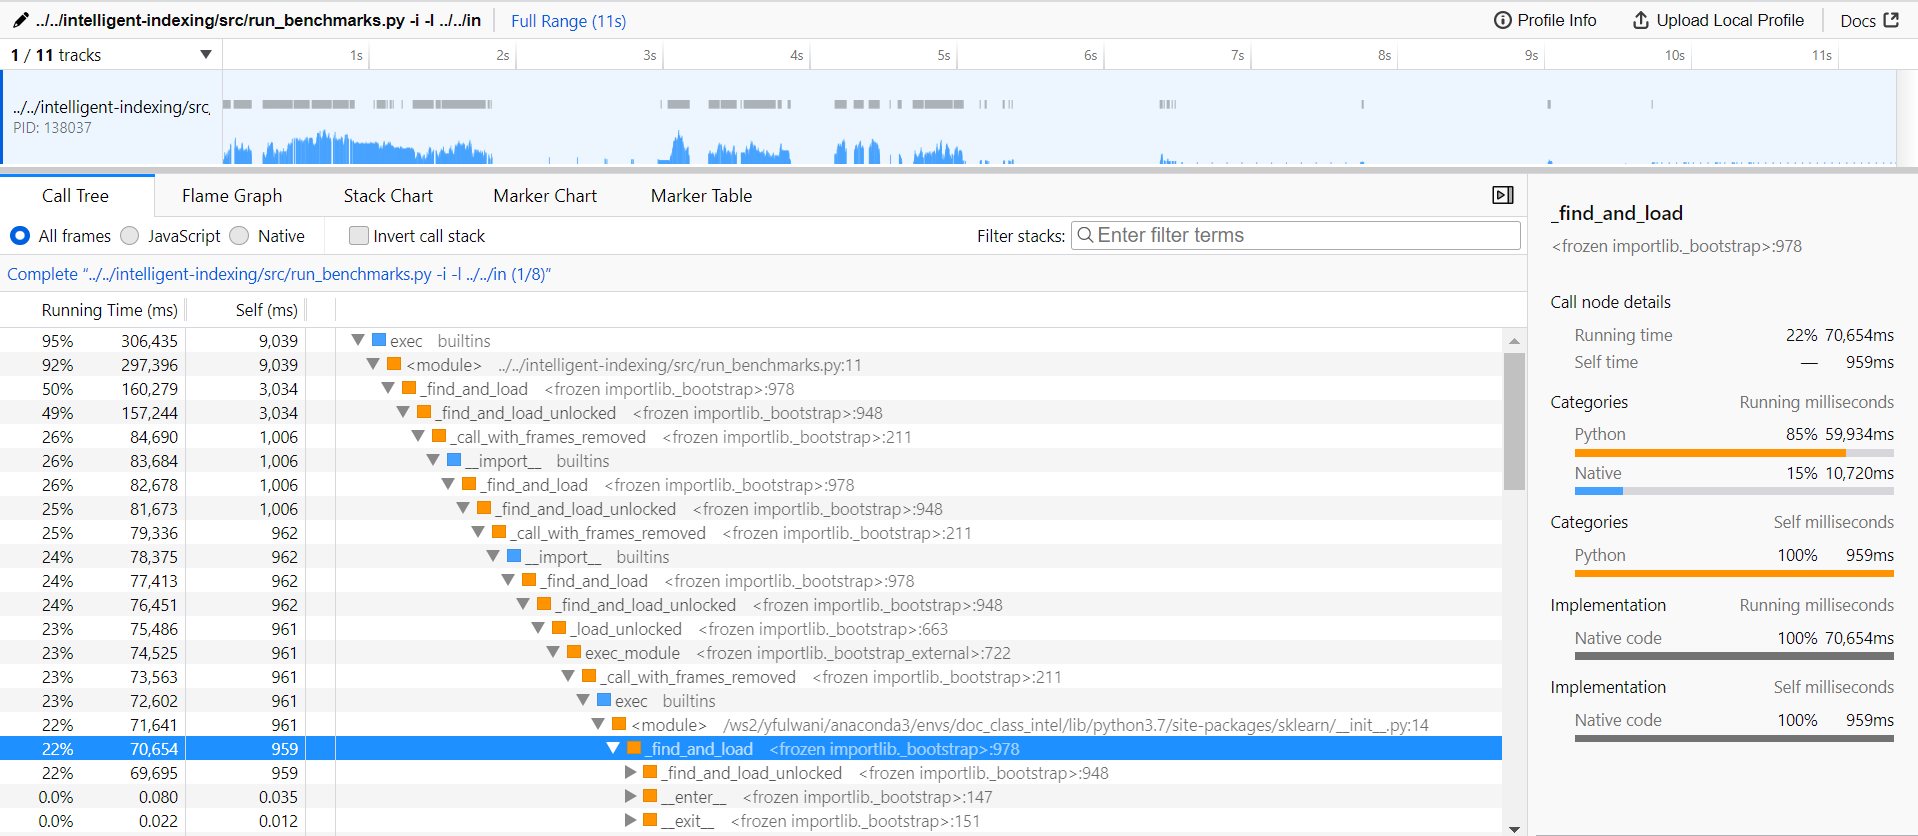

#### Profile the Intelligent Indexing Ref Kit with Intel optimized packages

To run the profiler on the intelligent indexing ref kit <br>
- Navigate to directory **intelligent-indexing/src/** in terminal
- ```conda activate doc_class_intel```

Exexcute the below command:

`functiontrace --output-dir '../../Profiling_Guide/FunctionTrace_Profiler/FunctionTrace_Results/oneapi_optimized_results/' run_benchmarks.py -i -l "../logs/intel_intel.log"`

To view **FunctionTrace results** download the json file for respective results and visit the **[firefox profiler](https://profiler.firefox.com/)** and upload the json file there to view results

Sample result has **Call Tree**, **Flame Graph**, **Stack Chart**, **Marker Chart**
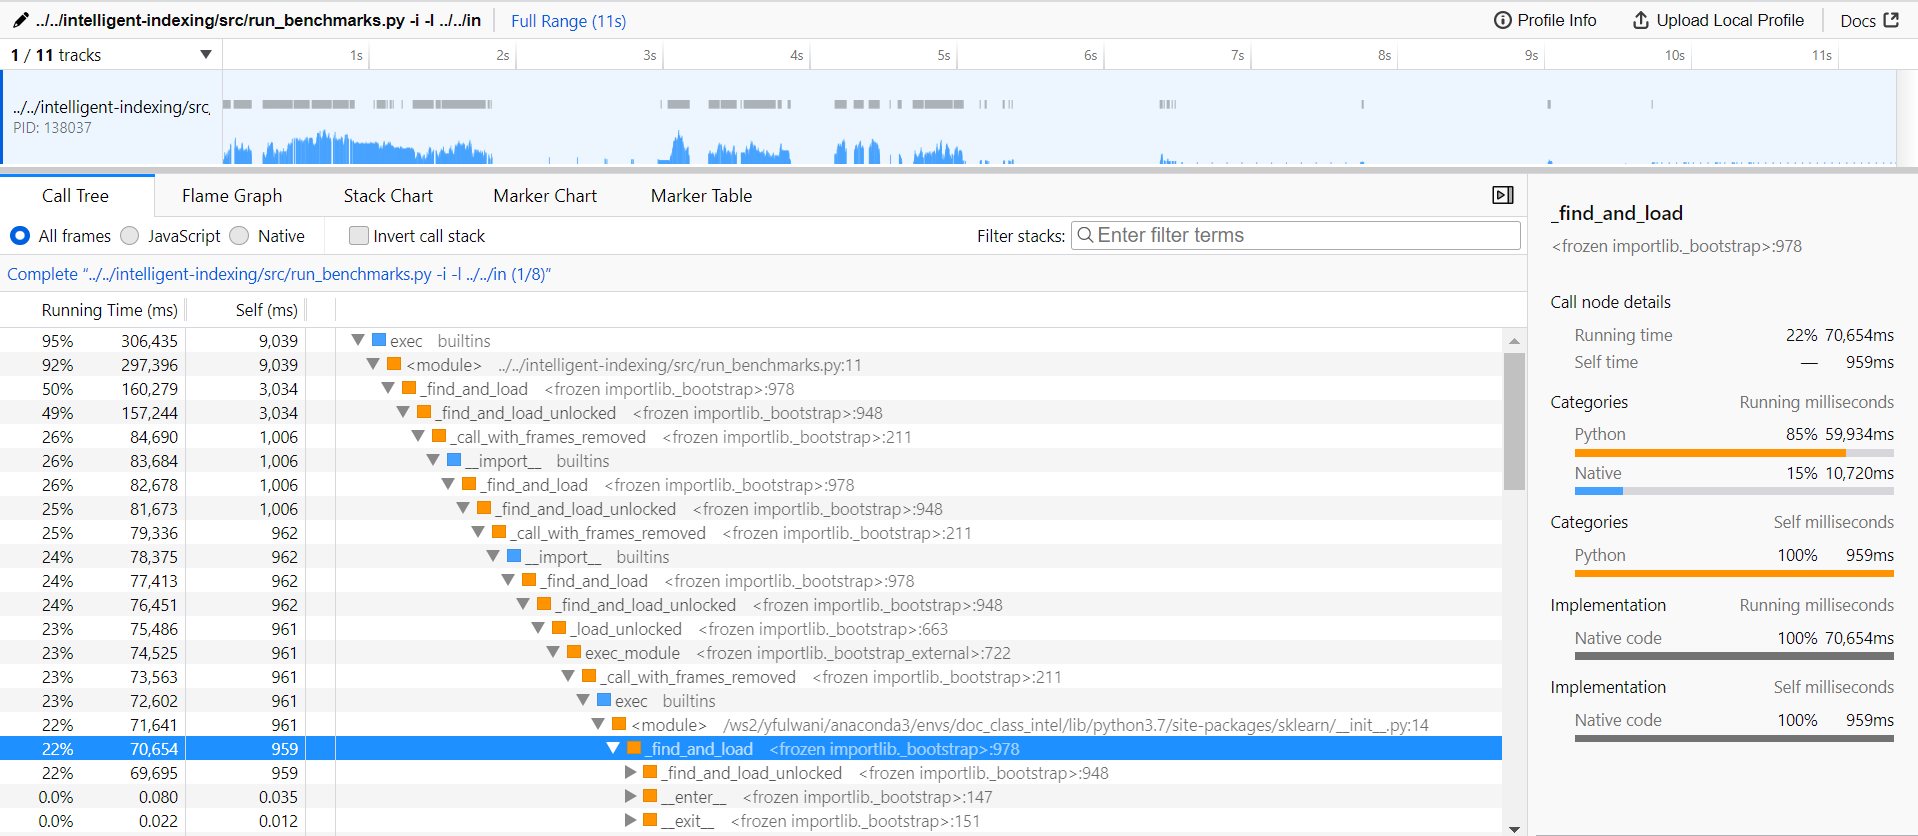